Plotting F_lift and F_drag wrt Time. Each time interval must be one leg cycle from the telemetry data.

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import sys
sys.path.append('../')
import os
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import pandas as pd
import numpy as np
import utils
from matplotlib.pyplot import Axes
import math
sns.set_style("whitegrid")
# sns.set_style("ticks",{'axes.grid' : False, 'grid.linestyle': '--', 'grid.color':'black'})
sns.set_palette("bright")


In [2]:
CALIBRATION_FILE = './calibration/out/C.mat'
DATA_FILE = './experiment_data/blue_feet/4/2016.10.08_20.45.13_trial_imudata.txt'

In [3]:
utils.print_header(DATA_FILE)

%  Data file recorded 2016/10/8  20:45:13
%  Stride Frequency         = [1, 1]
%  Lead In /Lead Out        = 
%  Deltas (Fractional)      = [0.25, 0.25, 0.25],[0.25, 0.25, 0.25]
%  Phase                    = 32768
%  Experiment.py 
%  Motor Gains    = [5000, 400, 200, 0, 300, 5000, 400, 200, 0, 300]



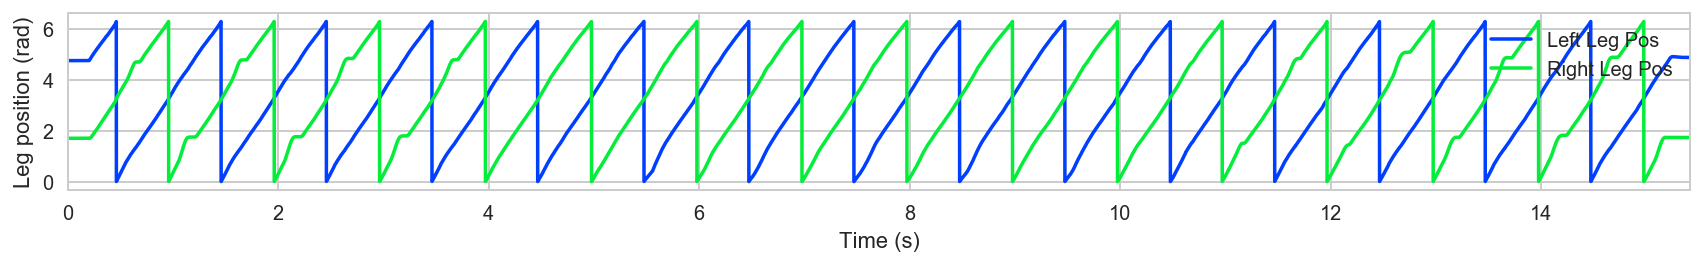

In [4]:
df = utils.process_data_files(DATA_FILE, CALIBRATION_FILE)
utils.plot_columns(df, [['Left Leg Pos', 'Right Leg Pos'],], display=True, save_figure=False)

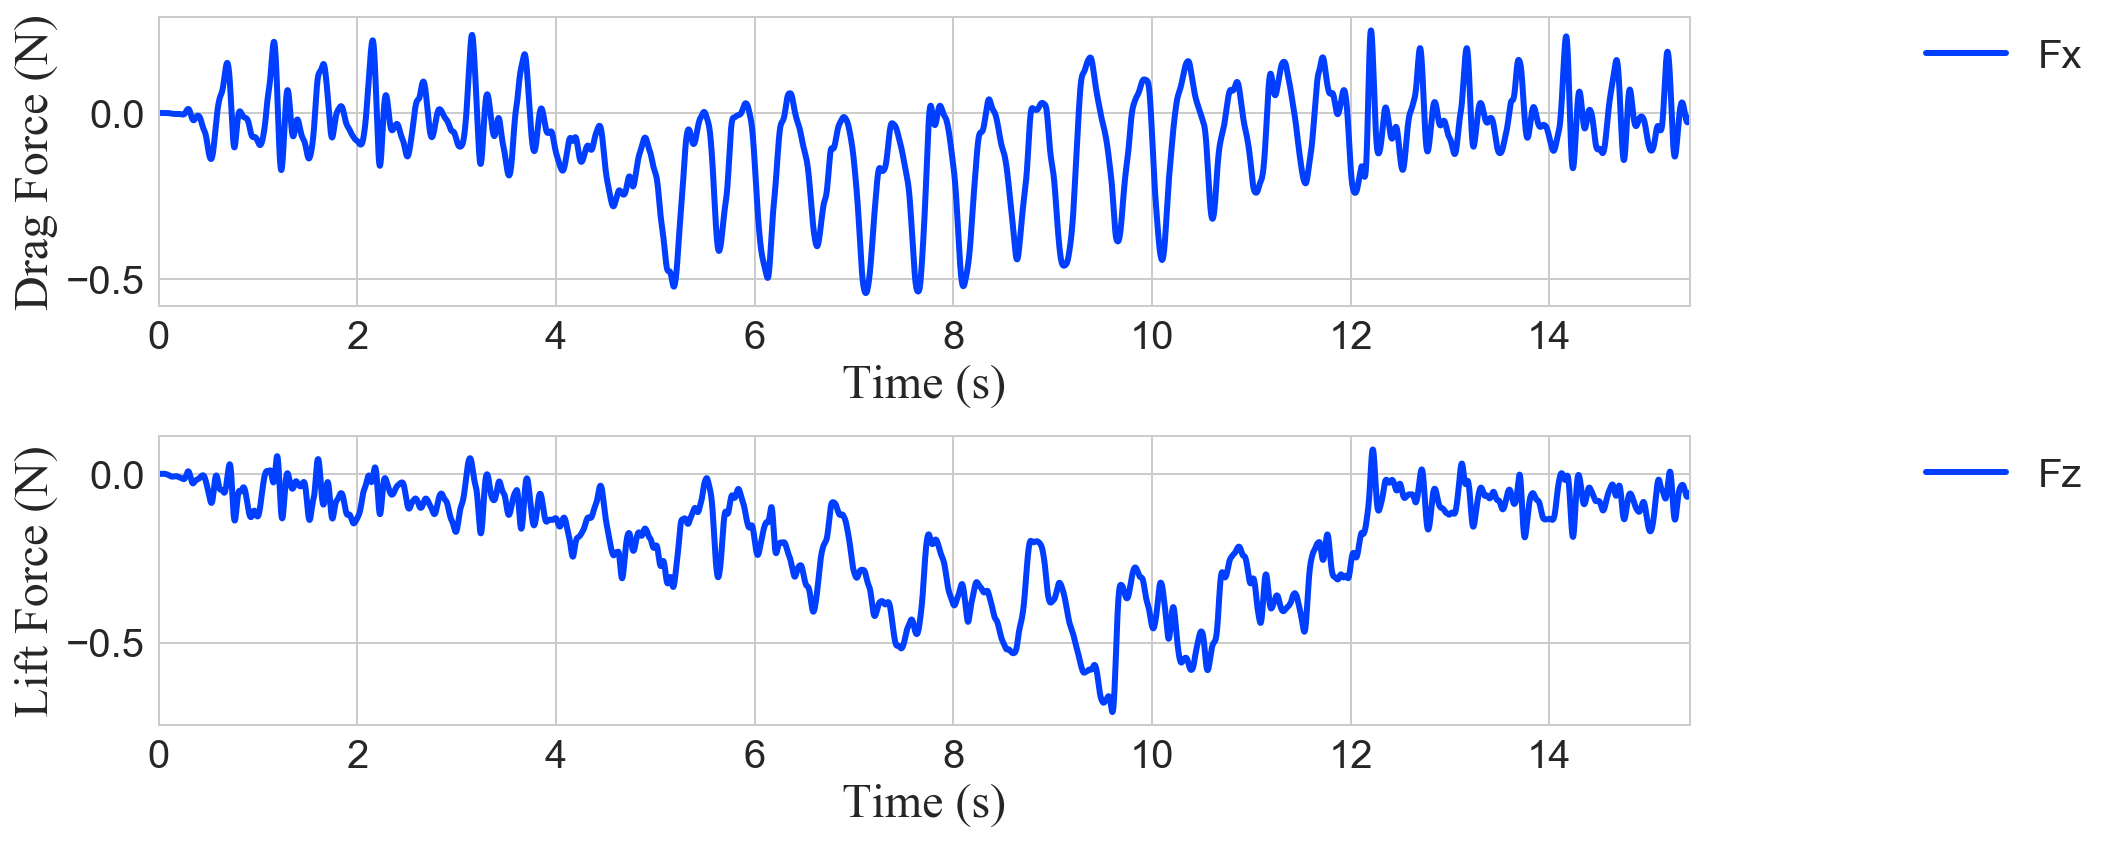

Saving image as ./out/bb_figures/raw_plots/raw_lift_drag_4cm.png
Image saved.


In [5]:
# Drag and Lift Forces
output_dir = "./out/bb_figures/raw_plots/"
filename="raw_lift_drag_4cm.png"
utils.plot_columns2(df, ['Fx','Fz'], output_dir, filename, display=True, save_figure=True)
# utils.plot_columns2(df, ['AX', 'AY', 'AZ', 'A_mag'], display=True,save_figure=False)

In [6]:
# print df["Right Leg Pos"].shape
# print str(max(df["Right Leg Pos"])) + " radians."
# print str(min(df["Right Leg Pos"])) + " radians."
# print "starts from: " + str(df["Right Leg Pos"][0]) + " radians."
# print "ends at: " + str(df["Right Leg Pos"][len(df["Right Leg Pos"])-1]) + " radians."
# print np.argmax(df["Right Leg Pos"][3963:])
# print df["Right Leg Pos"][3962]
# print df["Right Leg Pos"][13952]
# print
# print
# print df["Fx"].shape
# # print df["Fx"]

print np.argmax(df["Right Leg Pos"][0:1700])
print np.argmax(df["Right Leg Pos"][1700: 2500])
print df["Right Leg Pos"][957]
print df["Right Leg Pos"][1959]
# max_pos_intervals = {}
# i = 0
# for time in xrange(len(df["Right Leg Pos"])):
#     pos = df["Right Leg Pos"][time]
#     if pos not in max_pos_intervals:
#         max_pos_intervals[pos] = []
#     max_pos_intervals[pos].append(time)

# print max_pos_intervals
print np.argmax(df["Right Leg Pos"][3700:11700])
print np.argmax(df["Right Leg Pos"][11500:12000])

957
1959
6.2828018616
6.27973394962
3962
11945


### Figure

Plot the following:
* Leg position vs Time
* F_drag vs Time
* F_lift vs Time

In [9]:
def plot_force_v_position(df):
    fig = plt.figure()
    ax = fig.add_subplot(2,1,1)
    forces = df["Fx"]
    leg_positions = df["Right Leg Pos"]
    ax.plot(leg_positions, forces)
    ax.set_xlabel("Position(radians)")
    ax.set_ylabel("Drag Force(N)")
    plt.show()

def plot_forces_and_positions_interval(df, interval, output_dir, filename1, filename2, save_figure=False):
    drag_forces = df["Fx"][interval[0]:interval[1]+1]
    leg_positions = df["Right Leg Pos"][interval[0]: interval[1]+1]
#     leg_positions = np.linspace(0, 2*math.pi, len(forces)) - math.pi
    plot_force_v_position_interval_helper(drag_forces, leg_positions,"Drag Force(N)",output_dir,filename1,save_figure)
    lift_forces = df["Fz"][interval[0]:interval[1]+1]
    plot_force_v_position_interval_helper(lift_forces, leg_positions, "Lift Force(N)",output_dir, filename2,save_figure)

    
def plot_force_v_position_interval_helper(forces, leg_positions,plot_name,output_dir, filename, save_figure=False):
    xfont = {'fontname':'Times New Roman'}
    fig = plt.figure()
    ax = fig.add_subplot(2,1,1)
    ax.scatter(leg_positions, forces,s=10)
    ax.set_xlabel("Position (radians)", fontdict=xfont, fontsize=24)
    ax.set_ylabel(plot_name, fontdict=xfont, fontsize=24)
    ax.set_ylim([-0.8,0.4])
    ax.tick_params(axis='both', which='major', labelsize=20)
#     ax.set_xticklabels([r"$0$", r"$0$",
#                      r"$\pi$", r"$\frac{3}{2}\pi$", r"$2\pi$",r"$2\pi$",r"$2\pi$"])
    ax.set_xticks([0., .5*np.pi, np.pi, 1.5*np.pi, 2*np.pi])
    ax.set_xticklabels(["$0$", r"$\frac{1}{2}\pi$",r"$\pi$", r"$\frac{3}{2}\pi$", r"$2\pi$"],fontdict=xfont)
    ax.set_xlim(0, max(leg_positions))
    if save_figure:
        if not os.path.exists(output_dir):
            os.makedirs(output_dir)
        print "Saving image as", output_dir + filename
        fig.savefig(output_dir + filename, dpi=450)
        print "Image saved."
    plt.show()

def plot_force_v_force(df, interval,output_dir, filename,save_figure=False):
    xfont = {'fontname':'Times New Roman'}
    drag_forces = df["Fx"][interval[0]:interval[1]+1]
    lift_forces = df["Fz"][interval[0]:interval[1]+1]
    fig = plt.figure()
    ax = fig.add_subplot(2,1,1)
    ax.scatter(lift_forces,drag_forces,s=10)
    ax.set_ylabel("Drag Force(N)",fontdict=xfont,fontsize=24)
    ax.set_xlabel("Lift Force(N)",fontdict=xfont,fontsize=24)
    ax.set_ylim([-0.8,0.4])
    ax.tick_params(axis='both', which='major', labelsize=20)
#     ax.set_xticks([0., .5*np.pi, np.pi, 1.5*np.pi, 2*np.pi])
#     ax.set_xticklabels(["$0$", r"$\frac{1}{2}\pi$",r"$\pi$", r"$\frac{3}{2}\pi$", r"$2\pi$"],fontdict=xfont)
#     ax.set_xlim(min(lift_forces)-1, max(lift_forces)+1)
    if save_figure:
        if not os.path.exists(output_dir):
            os.makedirs(output_dir)
        print "Saving image as", output_dir + filename
        fig.savefig(output_dir + filename, dpi=450)
        print "Image saved."
    plt.show()

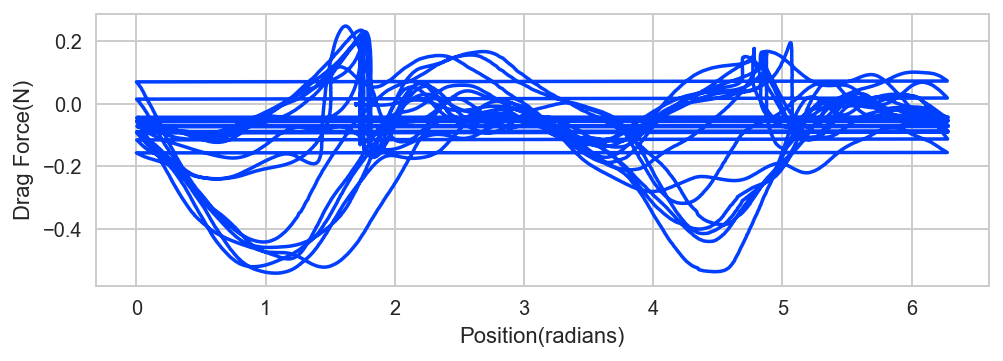

Saving image as ./out/bb_figures/5c_additional_figures/fig5c_1a.png
Image saved.


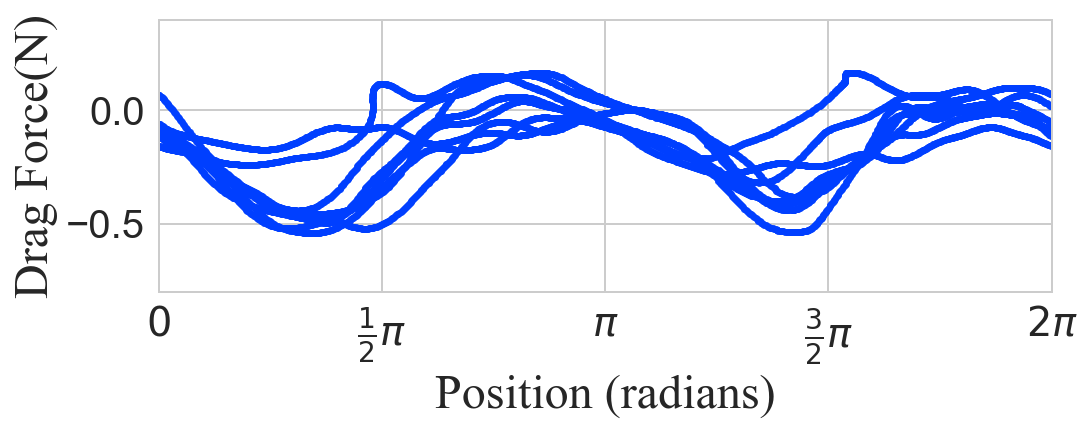

Saving image as ./out/bb_figures/5c_additional_figures/fig5c_1b.png
Image saved.


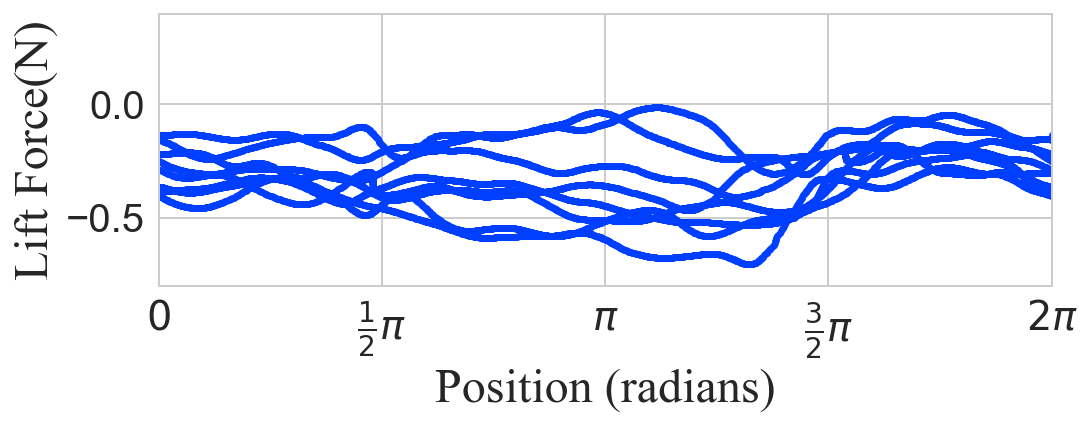

Saving image as ./out/bb_figures/5c_additional_figures/fig5c_1c.png
Image saved.


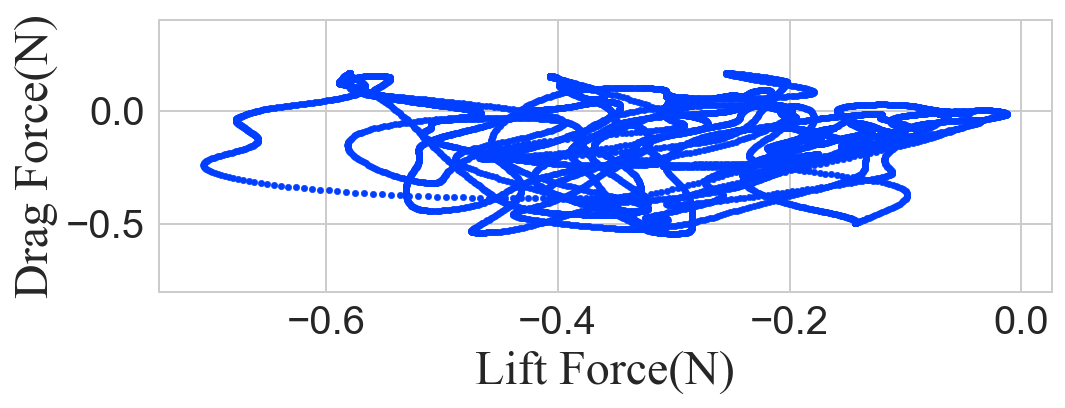

In [10]:
output_dir="./out/bb_figures/5c_additional_figures/"
filename1="fig5c_1a.png"
filename2="fig5c_1b.png"
filename3="fig5c_1c.png"
plot_force_v_position(df)
plot_forces_and_positions_interval(df, (3962, 11945), output_dir, filename1, filename2,save_figure=True)
plot_force_v_force(df, (3962, 11945), output_dir, filename3, save_figure=True)

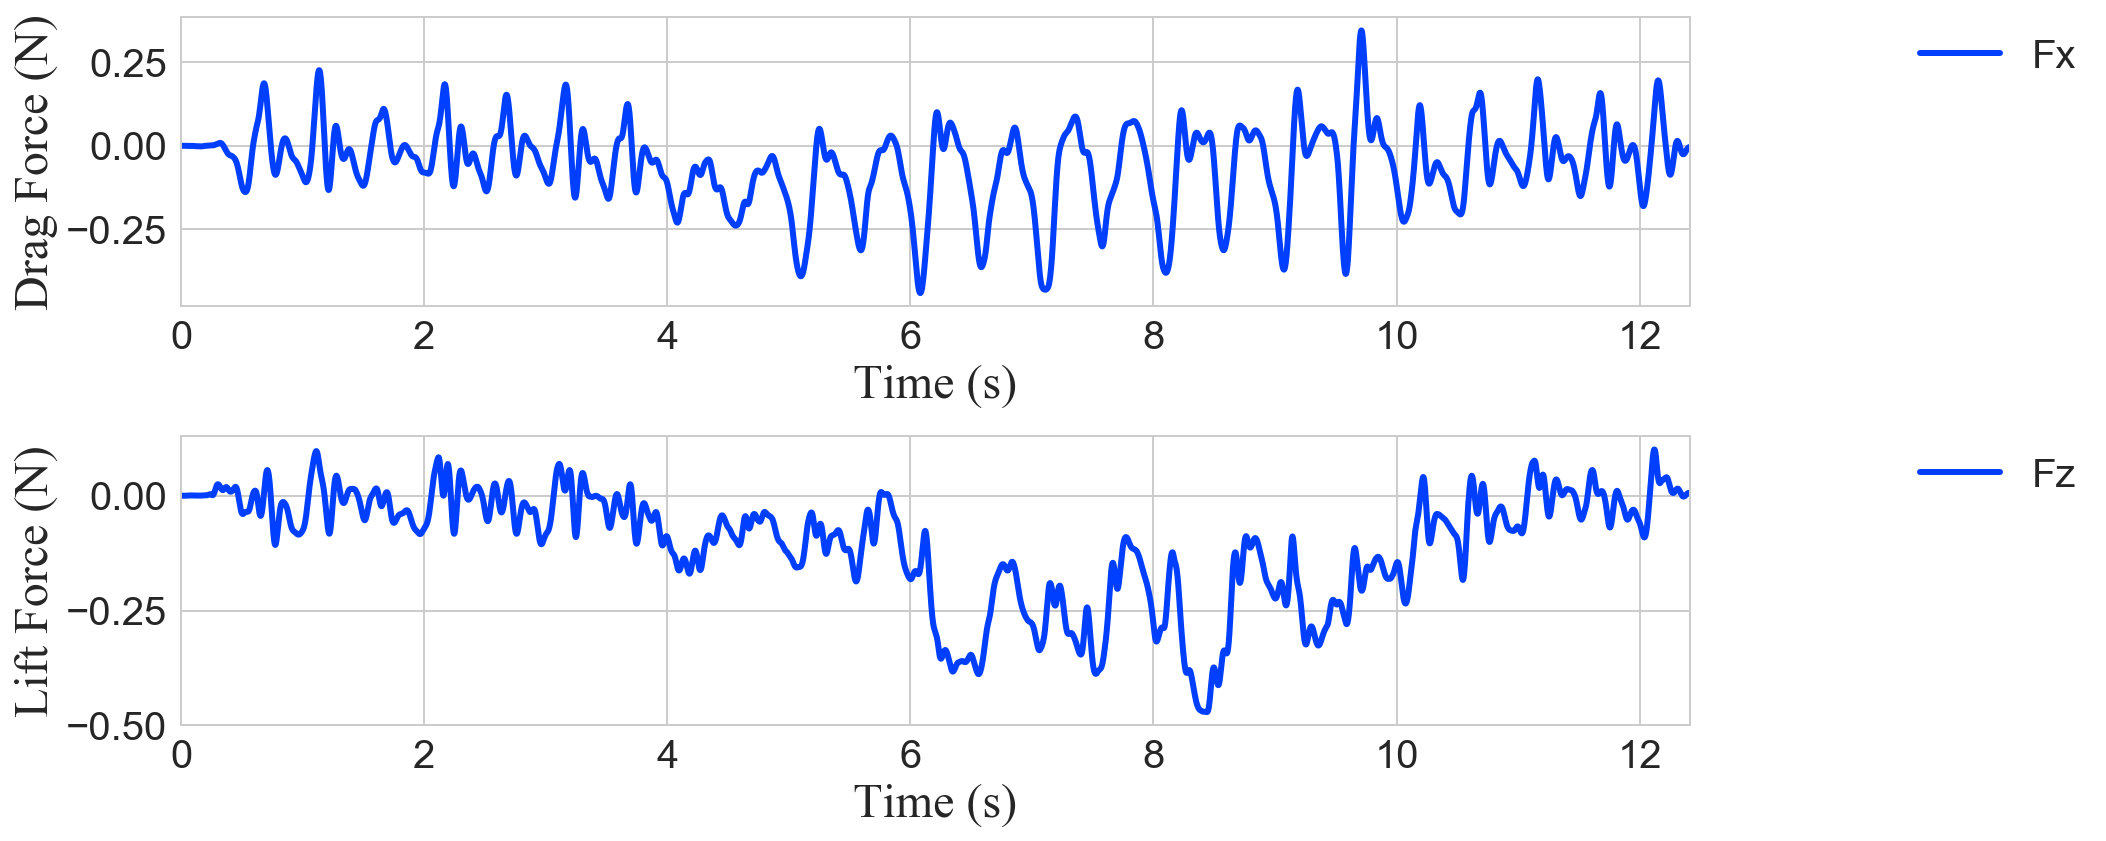

Saving image as ./out/bb_figures/raw_plots/raw_lift_drag_6cm.png
Image saved.


In [11]:
DATA_FILE2 = './experiment_data/blue_feet/6/important_experiments/2016.10.08_21.17.48_trial_imudata.txt'
output_dir = "./out/bb_figures/raw_plots/"
filename="raw_lift_drag_6cm.png"
# Drag and Lift Forces
df = utils.process_data_files(DATA_FILE2, CALIBRATION_FILE)
utils.plot_columns2(df, ['Fx','Fz'],output_dir,filename,display=True, save_figure=True)
# utils.plot_columns2(df, ['A_mag'], display=True,save_figure=True)

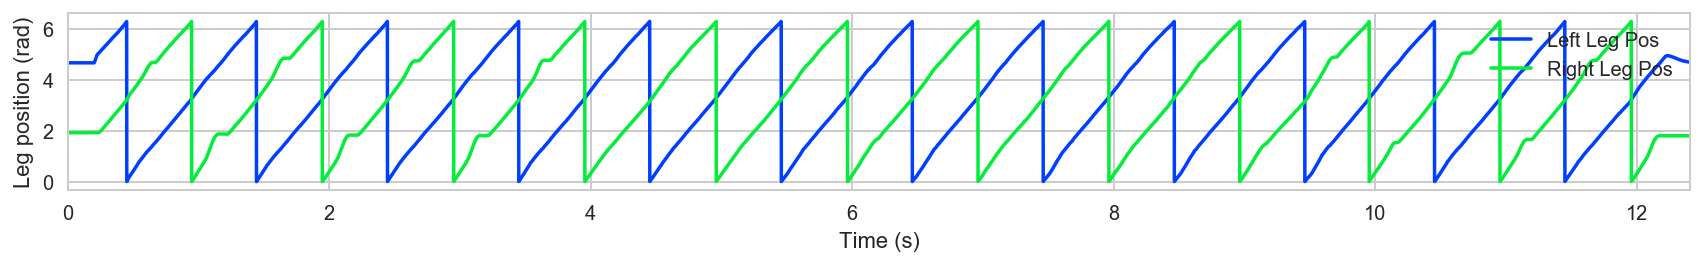

3950
10941


In [12]:
utils.plot_columns(df, [['Left Leg Pos', 'Right Leg Pos'],], display=True, save_figure=False)
print np.argmax(df["Right Leg Pos"][3700:4000])
print np.argmax(df["Right Leg Pos"][9500:12000])

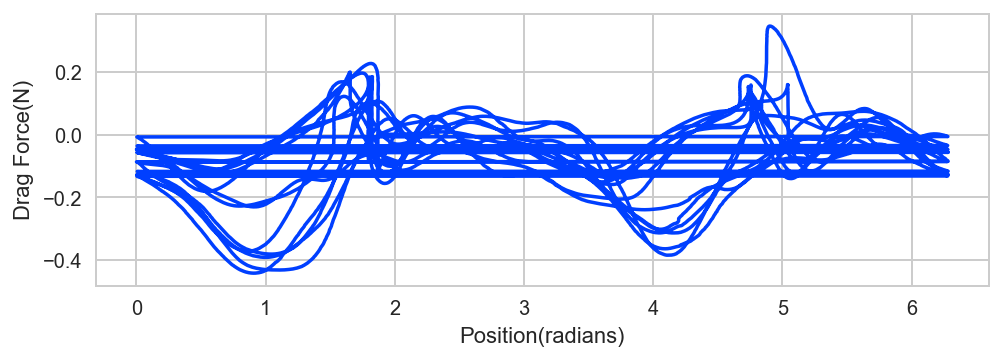

Saving image as ./out/bb_figures/5c_additional_figures/fig5c_2a.png
Image saved.


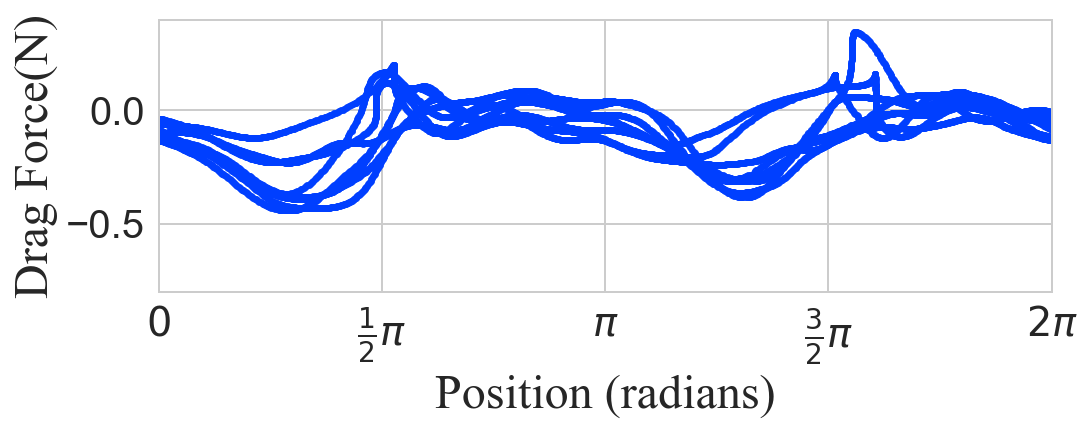

Saving image as ./out/bb_figures/5c_additional_figures/fig5c_2b.png
Image saved.


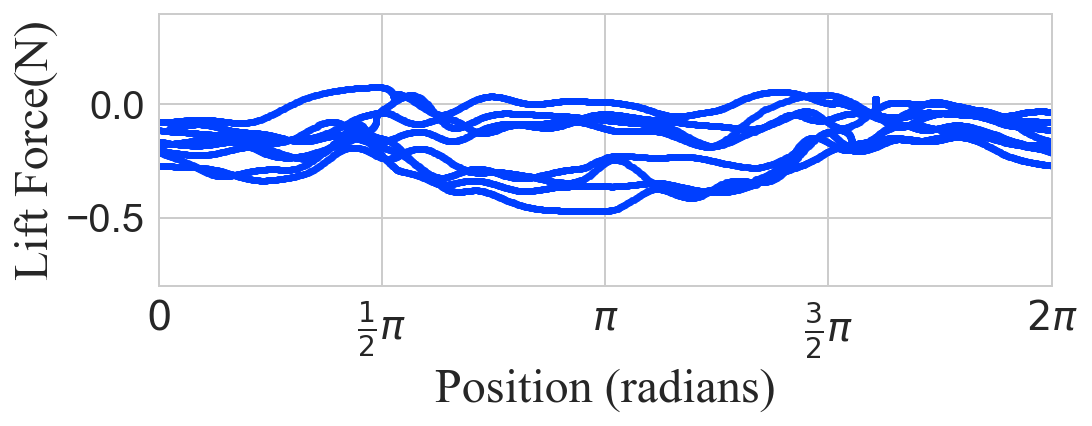

Saving image as ./out/bb_figures/5c_additional_figures/fig5c_2c.png
Image saved.


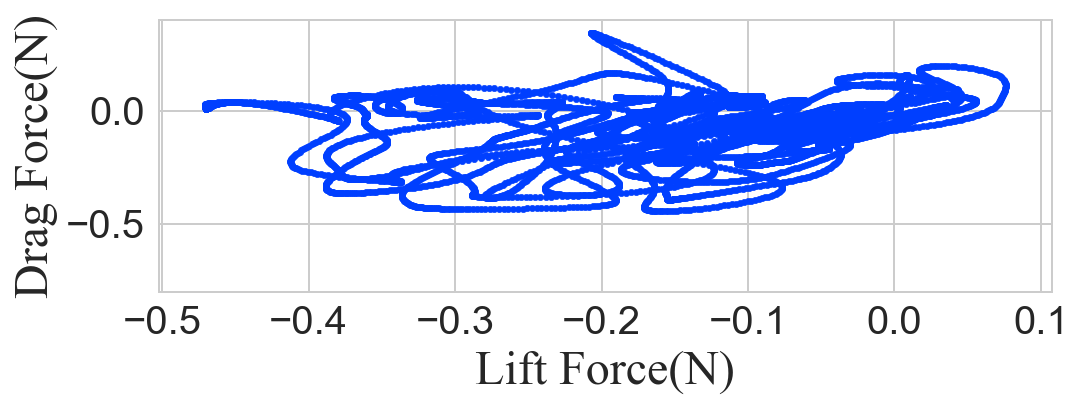

In [13]:
output_dir="./out/bb_figures/5c_additional_figures/"
filename1="fig5c_2a.png"
filename2="fig5c_2b.png"
filename3="fig5c_2c.png"
plot_force_v_position(df)
plot_forces_and_positions_interval(df, (3962, 11945), output_dir, filename1, filename2,save_figure=True)
plot_force_v_force(df, (3962, 11945), output_dir, filename3, save_figure=True)

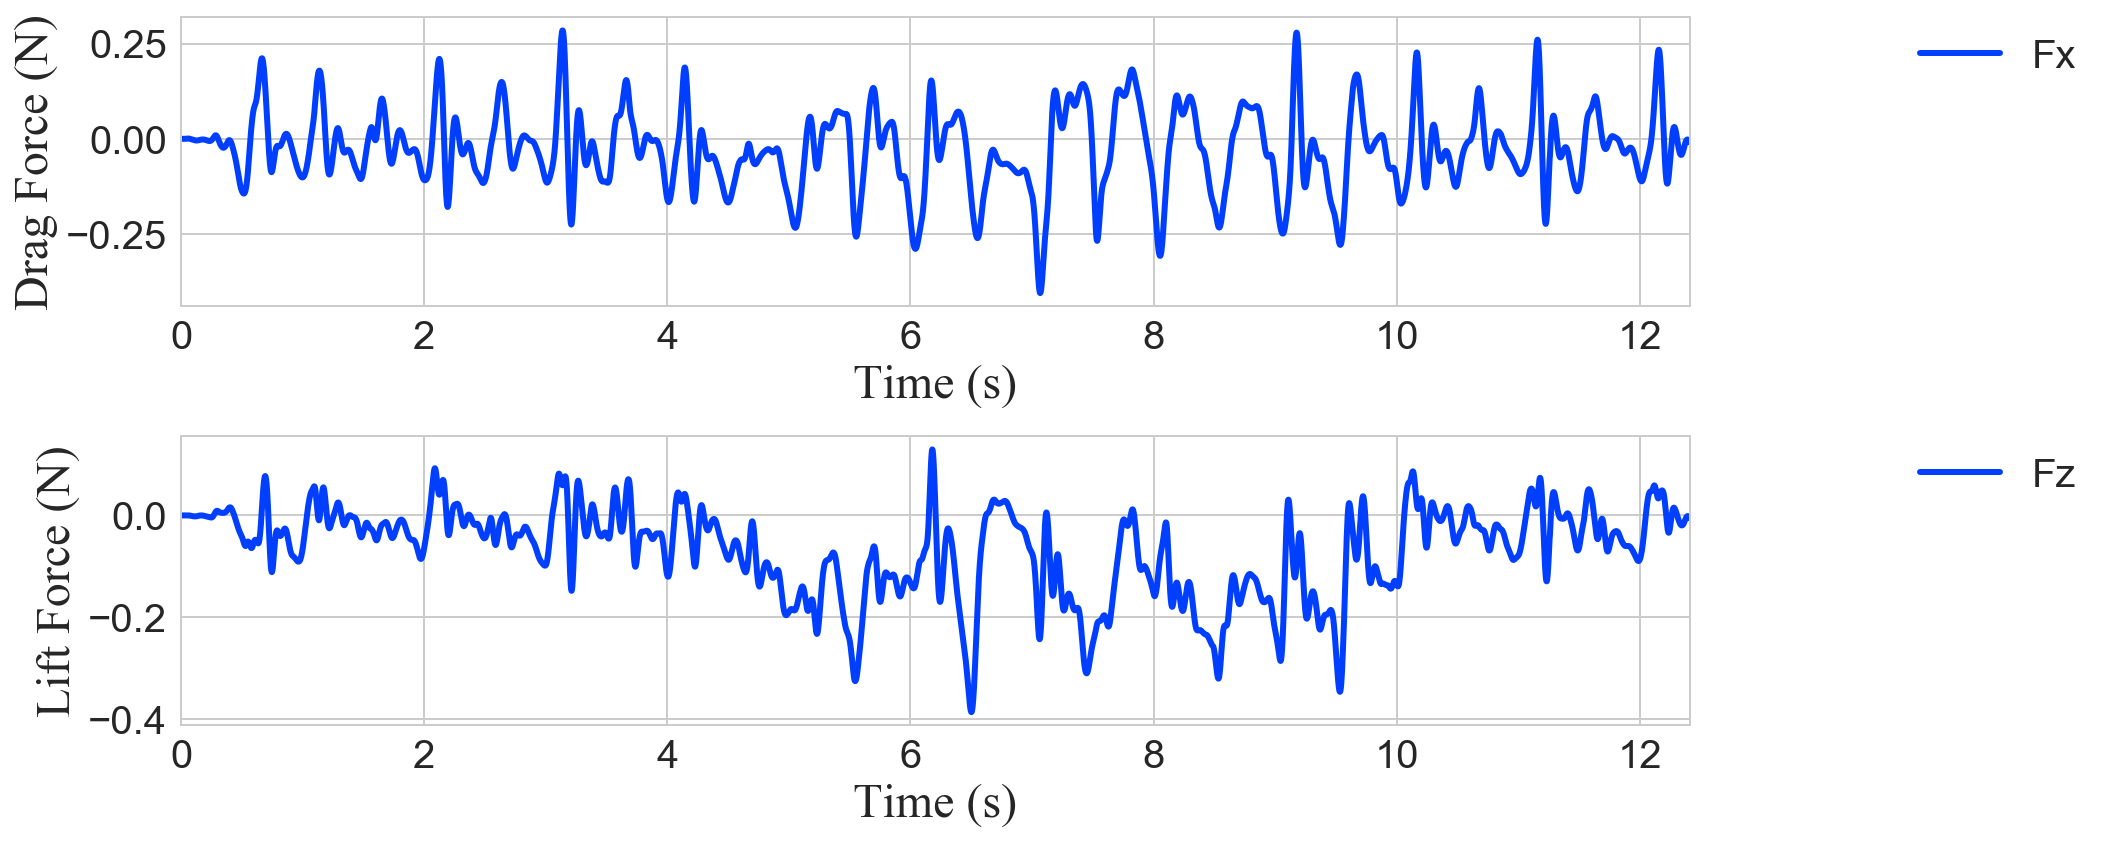

Saving image as ./out/bb_figures/raw_plots/raw_lift_drag_8cm.png
Image saved.


In [14]:
DATA_FILE3 = './experiment_data/blue_feet/8/important_experiments/2016.10.08_19.11.34_trial_imudata.txt'
output_dir = "./out/bb_figures/raw_plots/"
filename="raw_lift_drag_8cm.png"
# Drag and Lift Forces
df = utils.process_data_files(DATA_FILE3, CALIBRATION_FILE)
utils.plot_columns2(df, ['Fx','Fz'],output_dir, filename, display=True, save_figure=True)
# utils.plot_columns2(df, ['A_mag'], display=True,save_figure=False)

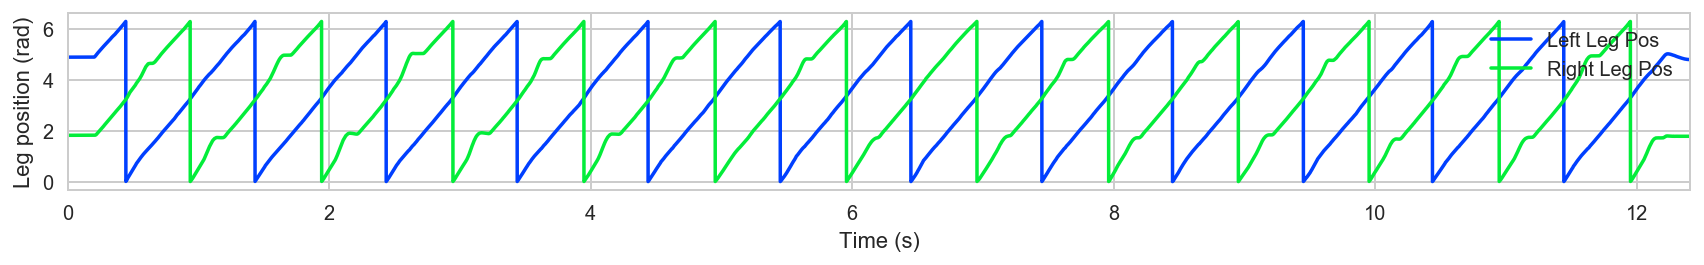

3943
9942


In [15]:
utils.plot_columns(df, [['Left Leg Pos', 'Right Leg Pos'],], display=True, save_figure=False)
print np.argmax(df["Right Leg Pos"][3700:4000])
print np.argmax(df["Right Leg Pos"][9000:12000])

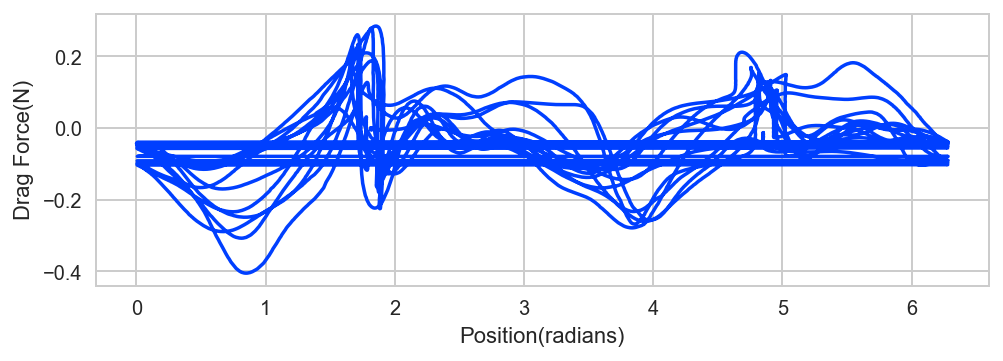

Saving image as ./out/bb_figures/5c_additional_figures/fig5c_3a.png
Image saved.


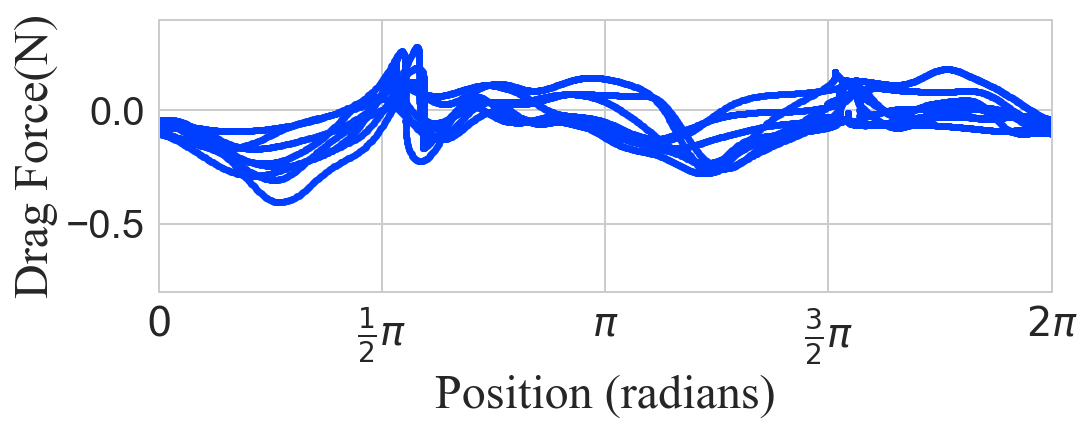

Saving image as ./out/bb_figures/5c_additional_figures/fig5c_3b.png
Image saved.


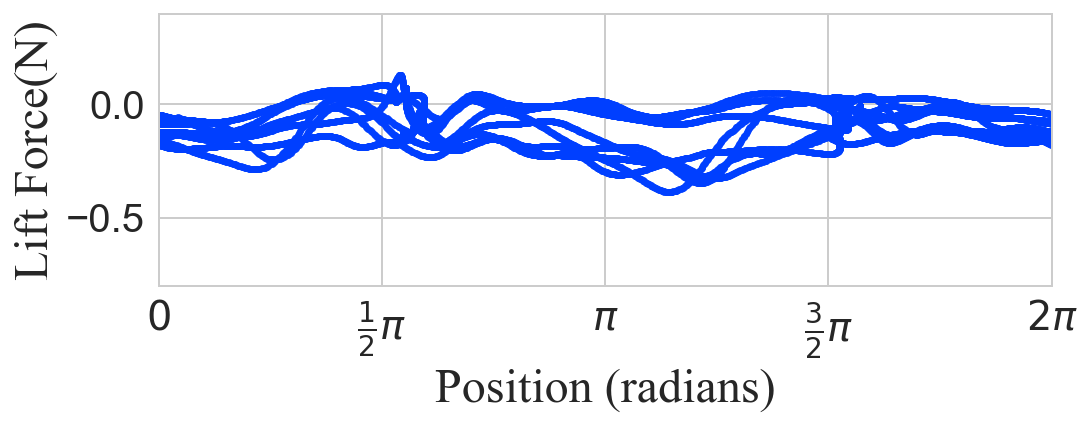

Saving image as ./out/bb_figures/5c_additional_figures/fig5c_3c.png
Image saved.


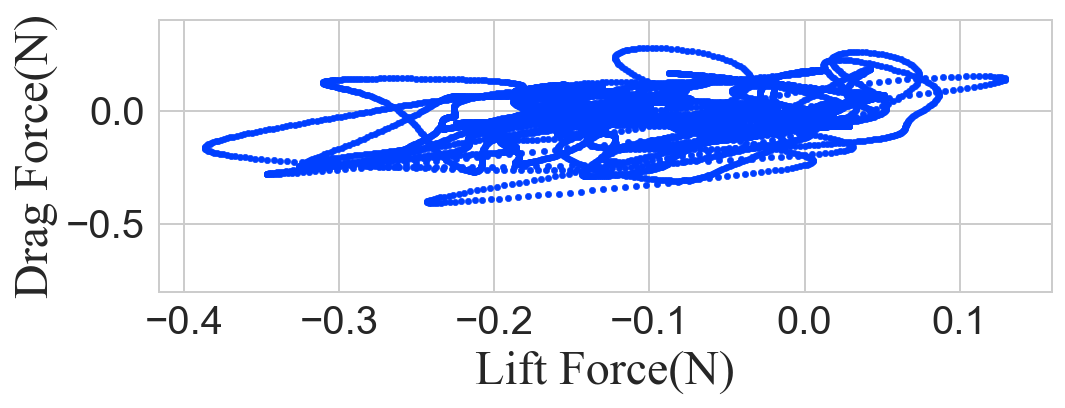

In [16]:
output_dir="./out/bb_figures/5c_additional_figures/"
filename1="fig5c_3a.png"
filename2="fig5c_3b.png"
filename3="fig5c_3c.png"
plot_force_v_position(df)
plot_forces_and_positions_interval(df, (3962, 11945), output_dir, filename1, filename2,save_figure=True)
plot_force_v_force(df, (3962, 11945), output_dir, filename3, save_figure=True)

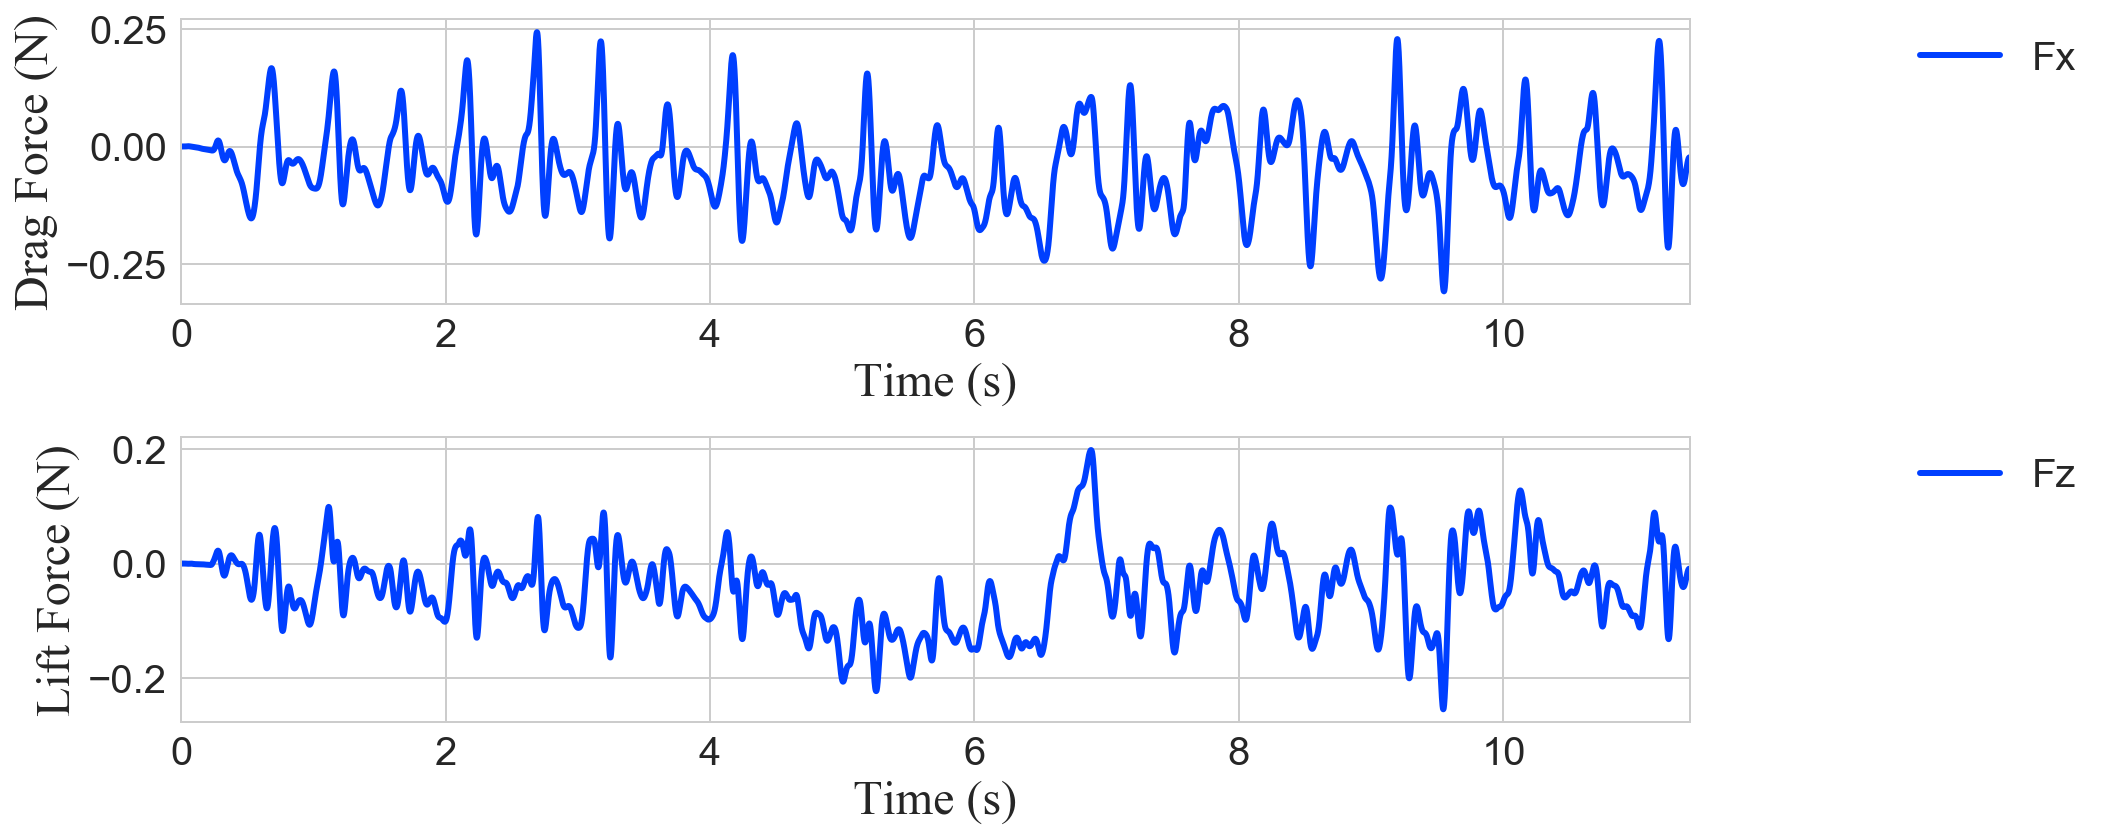

Saving image as ./out/bb_figures/raw_plots/raw_lift_drag_10cm.png
Image saved.


In [17]:
DATA_FILE4 = './experiment_data/blue_feet/10/important_experiments/2016.10.07_00.21.03_trial_imudata.txt'
output_dir = "./out/bb_figures/raw_plots/"
filename="raw_lift_drag_10cm.png"
# Drag and Lift Forces
df = utils.process_data_files(DATA_FILE4, CALIBRATION_FILE)
utils.plot_columns2(df, ['Fx','Fz'],output_dir,filename, display=True, save_figure=True)


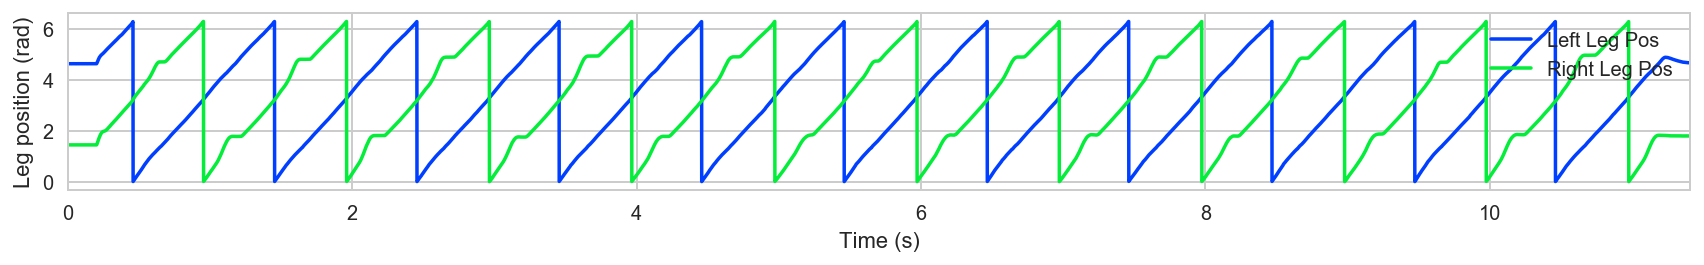

3962
9964


In [18]:
utils.plot_columns(df, [['Left Leg Pos', 'Right Leg Pos'],], display=True, save_figure=False)
print np.argmax(df["Right Leg Pos"][3700:4000])
print np.argmax(df["Right Leg Pos"][8000:12000])

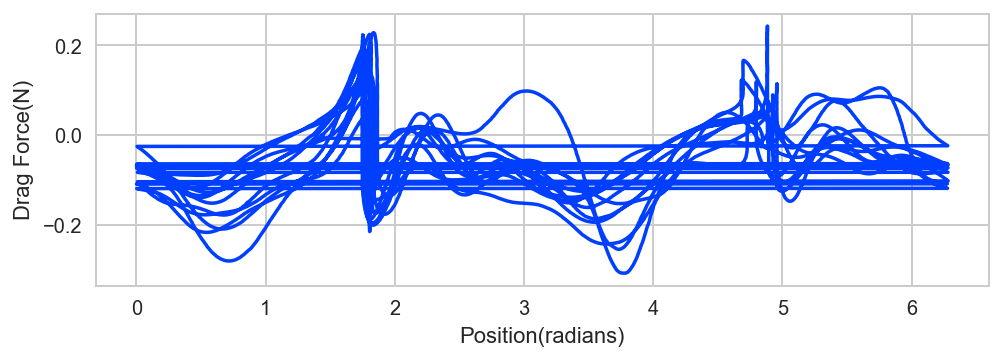

Saving image as ./out/bb_figures/5c_additional_figures/fig5c_4a.png
Image saved.


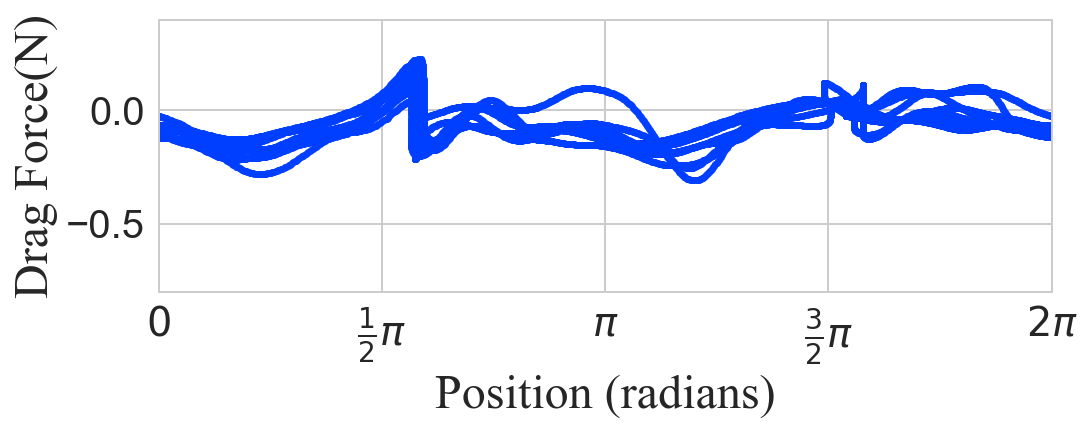

Saving image as ./out/bb_figures/5c_additional_figures/fig5c_4b.png
Image saved.


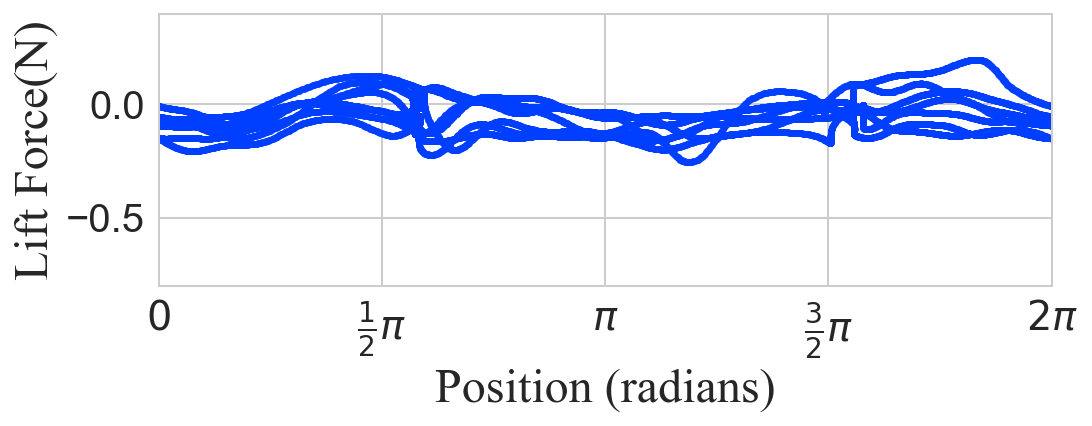

Saving image as ./out/bb_figures/5c_additional_figures/fig5c_4c.png
Image saved.


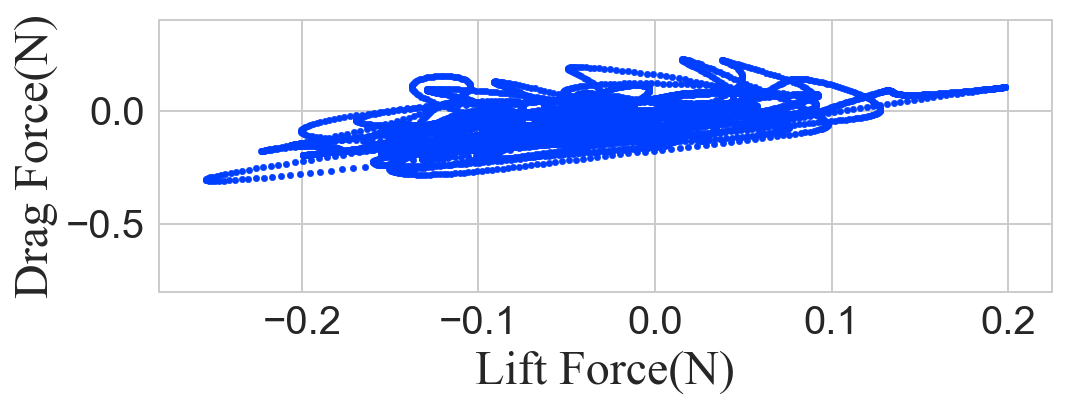

In [19]:
output_dir="./out/bb_figures/5c_additional_figures/"
filename1="fig5c_4a.png"
filename2="fig5c_4b.png"
filename3="fig5c_4c.png"
plot_force_v_position(df)
plot_forces_and_positions_interval(df, (3962, 11945), output_dir, filename1, filename2,save_figure=True)
plot_force_v_force(df, (3962, 11945), output_dir, filename3, save_figure=True)

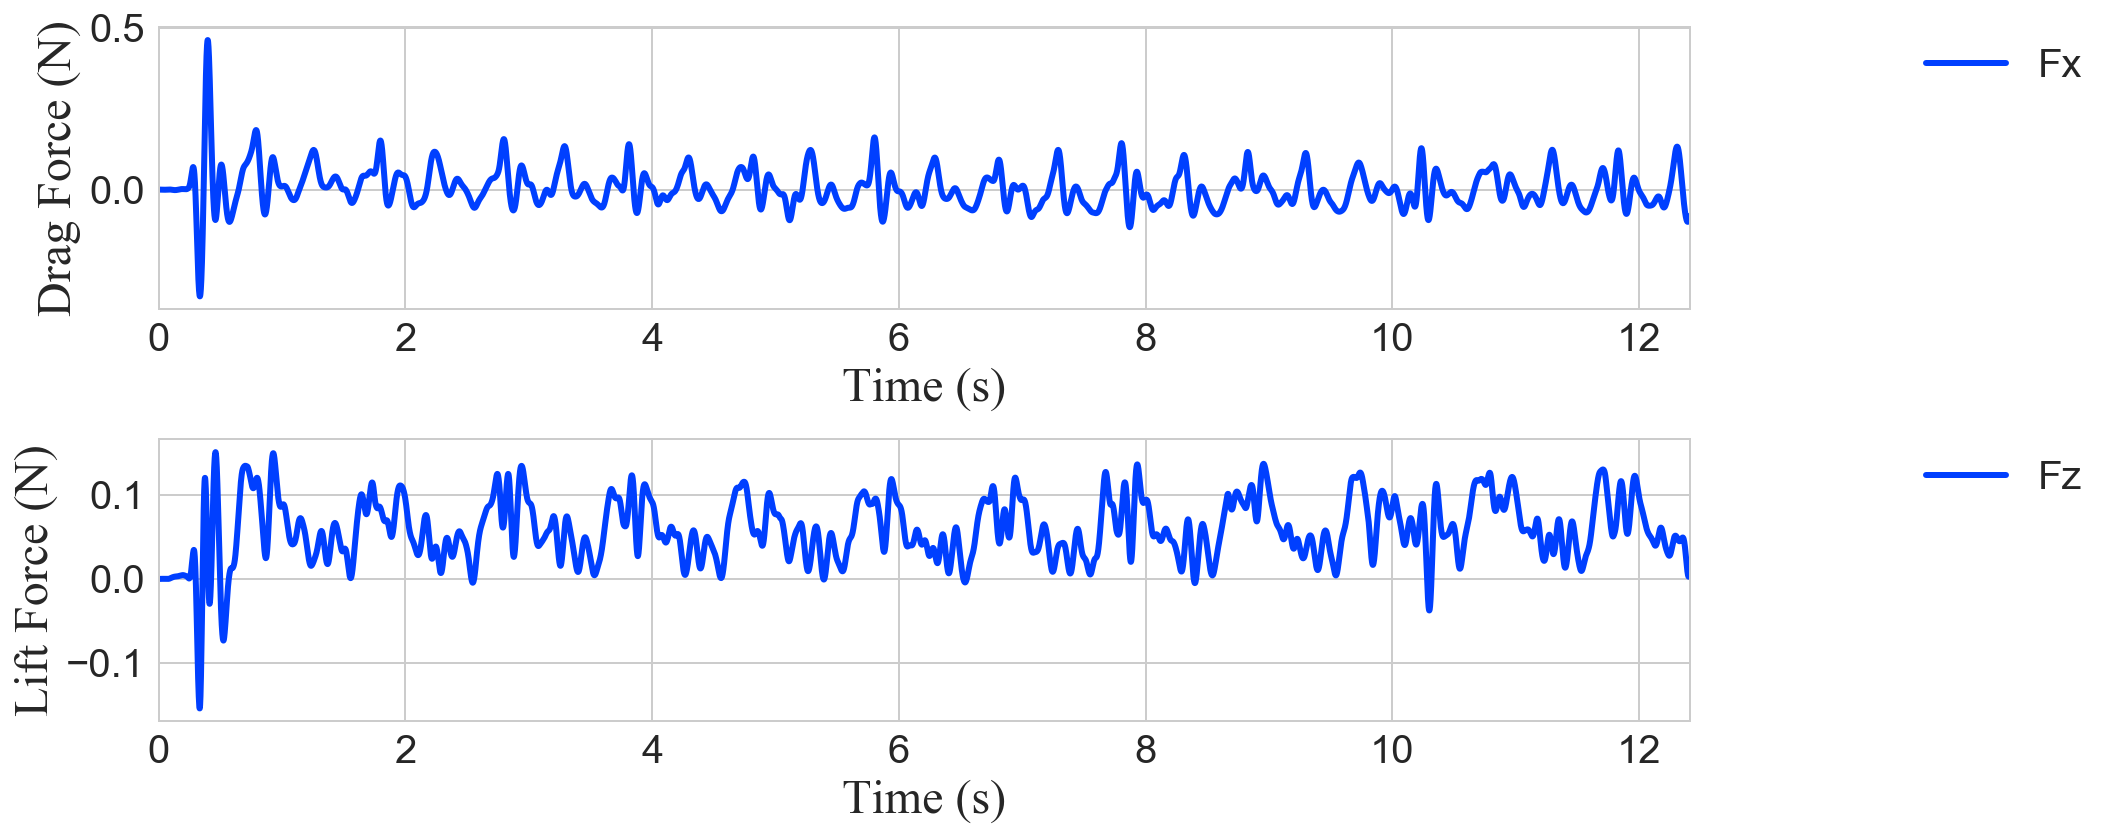

Saving image as ./out/bb_figures/raw_plots/raw_lift_drag_free.png
Image saved.


In [20]:
DATA_FILE5 = './experiment_data/blue_feet/test_chasis_movement/14/important_experiments/2017.06.05_13.51.57_trial_imudata.txt'
output_dir = "./out/bb_figures/raw_plots/"
filename="raw_lift_drag_free.png"
# Drag and Lift Forces
df = utils.process_data_files(DATA_FILE5, CALIBRATION_FILE)
utils.plot_columns2(df, ['Fx','Fz'],output_dir,filename,display=True, save_figure=True)
# utils.plot_columns2(df, ['A_mag'], display=True,save_figure=False)

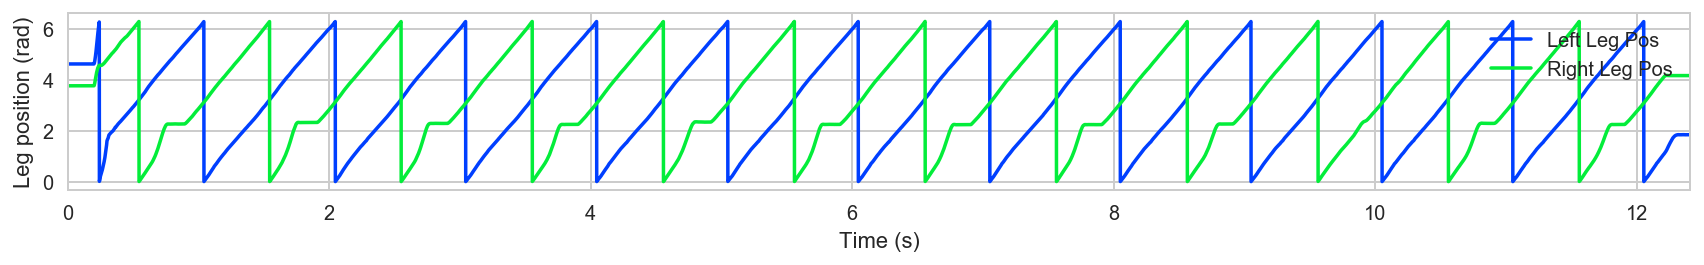

3999
8552


In [21]:
utils.plot_columns(df, [['Left Leg Pos', 'Right Leg Pos'],], display=True, save_figure=False)
print np.argmax(df["Right Leg Pos"][3700:4000])
print np.argmax(df["Right Leg Pos"][8000:9000])

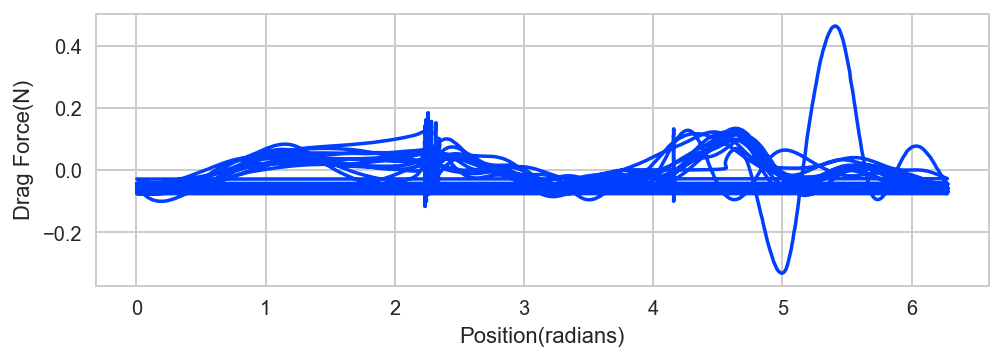

Saving image as ./out/bb_figures/5c_additional_figures/fig5c_5a.png
Image saved.


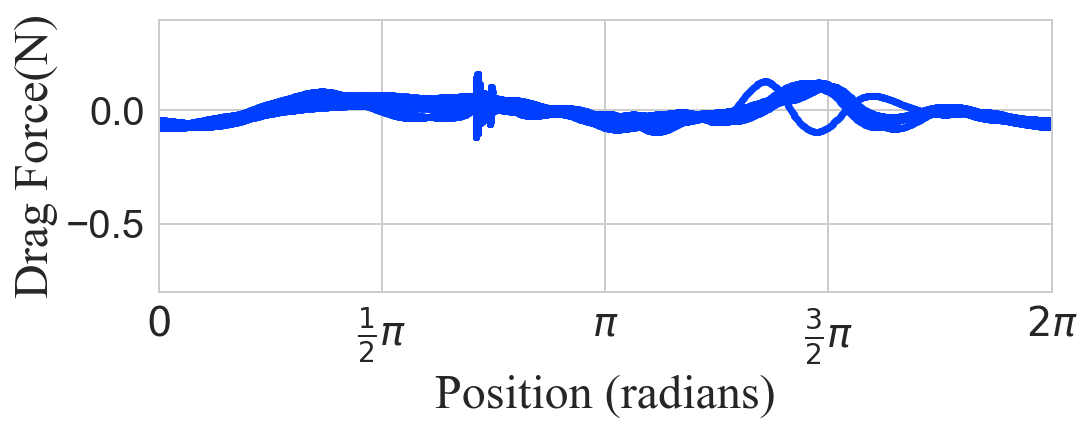

Saving image as ./out/bb_figures/5c_additional_figures/fig5c_5b.png
Image saved.


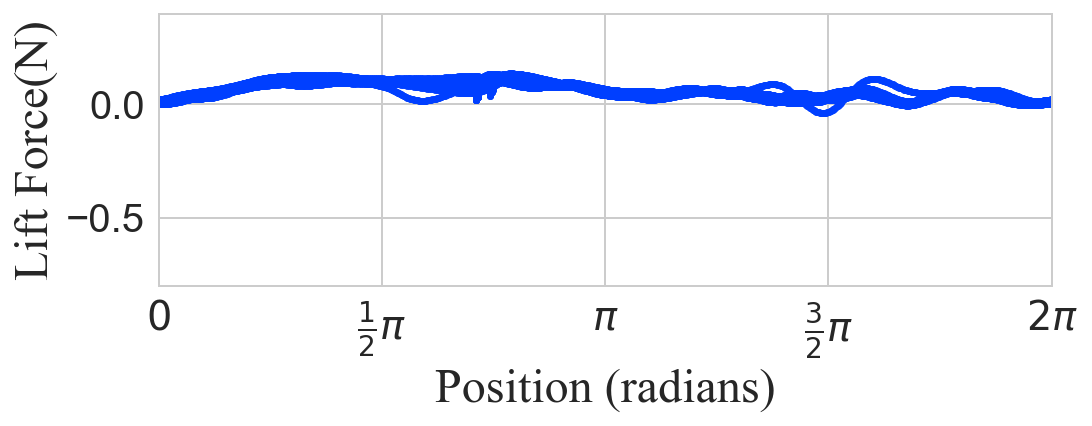

Saving image as ./out/bb_figures/5c_additional_figures/fig5c_5c.png
Image saved.


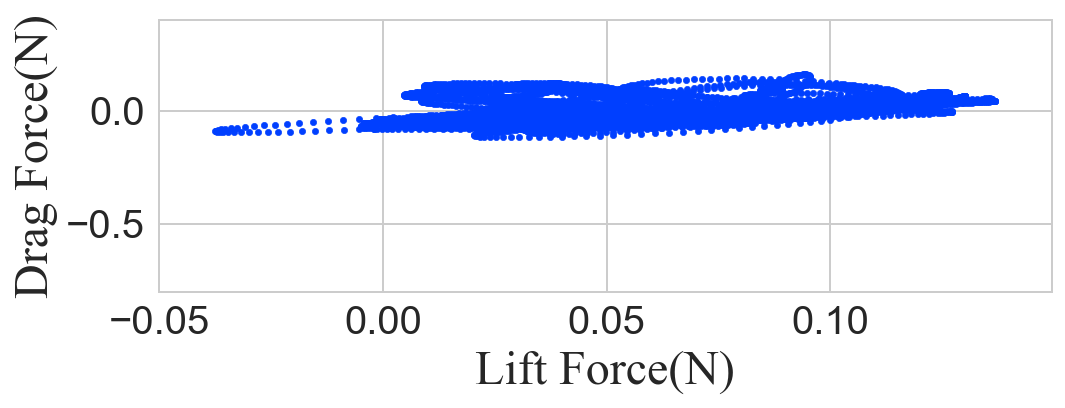

In [22]:
output_dir="./out/bb_figures/5c_additional_figures/"
filename1="fig5c_5a.png"
filename2="fig5c_5b.png"
filename3="fig5c_5c.png"
plot_force_v_position(df)
plot_forces_and_positions_interval(df, (3958, 11945), output_dir, filename1, filename2,save_figure=True)
plot_force_v_force(df, (3962, 11945), output_dir, filename3, save_figure=True)
# plot_force_v_position(df)
# plot_forces_and_positions_interval(df, (3958, 8955))
# plot_force_v_force(df, (3958, 8955))

#### Meeting Notes

* For cycles in the leg are the cycles the same ?
* Get it inside the steady state.
* Tricky part is that position is quantized. Parse it in between the steps.
* Plots should be Force vs Leg Position.
* Ron's code that might be useful is located inside his github repo : telemetry/blob/telem_turn/telem_turn.py

* -pi to pi time chunks might be more useful.
* 
